# Signal Processing in Practice Laboratory

**Assignment 1: Array processing**




**Submission instructions:**


*   **Make a copy of the Colab .ipynb file** and **share the link in Teams** as instructed.
* Use text cells to answer. Type equations in Latex in a text cell.
* For the programming part the homework, use code cell and text cell. The submitted codes should compile without any errors and do not erase the outputs.

In [ ]:
# Name: Saptarshi Mandal
# SR number: 22925

**Task 1.** Generate the array response

$$
{\bf a}(\theta) = \left[\begin{array}{c}1 \\e^{j 2\pi\Delta\sin \theta} \\e^{j 4\pi\Delta\sin \theta} \\ \vdots \\e^{j 2\pi\Delta(M-1)\sin \theta}\end{array}\right] : M \times 1
$$
  of a
	uniform linear array with $M$ elements and spacing $\Delta$ wavelengths
	to a source coming from direction $\theta$ degrees

In [ ]:
# Write your code here

import numpy as np
#import anything else that is needed
from matplotlib import pyplot as plt

# Array steering vector
def gen_a(M,Delta,theta):

    theta = np.pi/180 * theta

    return np.exp( 2 * np.pi * Delta *  np.arange(0,M) * np.sin(theta)* 1j, dtype='complex')

**Task 2.** Write a script to plot the spatial response $|y| = |{\bf w}^H{\bf a}({\boldsymbol \theta})|$ of a given beamformer $\bf w$ as a function of the direction $\theta$ of a source with array response ${\bf a}(\theta)$.

In [ ]:
# Write your code here

# spatial response
def spat_response(w,Delta,theta_range):

    A = np.array([gen_a(len(w), Delta, theta) for theta in theta_range])
    y = A @ np.conjugate(w.T)

    return np.abs(y)

**Task 3.** Generate a data matrix ${\bf X} = {\bf A}_{\theta} {\bf S} + {\bf N}$
	as function of the directions ${\boldsymbol \theta} = [\theta_1 \ \cdots \ \theta_d]^T$,
	number of
	antennas $M$, number of samples $N$, and signal-to-noise ratio
	(SNR) in dB (the SNR is defined as the ratio of the source
	power of a single user over the noise power). Here,
$$
	{\bf A}_{\theta} = [{\bf a}(\theta_1), {\bf a}(\theta_2), \cdots, {\bf a}(\theta_d)] : M \times d.
$$

The source symbols ${\bf S}: d \times N$ are chosen uniformly at random from a QPSK alphabet $\{(\pm1 \pm j)/\sqrt{2}\}$. The noise matrix ${\bf N}: M\times N$ is random zero-mean complex Gaussian matrix. To generate a complex noise with  variance $\sigma^2$.

In [ ]:
# generate data matrix
def gen_data(M,N,Delta,theta,SNR):

    d = len(theta)

    A = np.array([gen_a(M, Delta, theta_value) for theta_value in theta]).T

    QPSK = np.array([(1 + 1j)/np.sqrt(2) , (1 - 1j)/np.sqrt(2), (-1 + 1j)/np.sqrt(2), (-1 - 1j)/np.sqrt(2)])

    S = np.random.choice(QPSK, size = (d,N))

    sigma = np.sqrt(np.linalg.norm(A @ S) / 10 ** (SNR / 10))

    Noise = np.random.normal(loc=0, scale = sigma, size = (M,N))

    # print(f'A : {A.shape} S : {S.shape} Noise : {Noise.shape}')

    return A @ S + Noise

**[10 pts.] Question 1.** Plot the spatial response for ${\bf w} = [1,1, \cdots 1]^T$ with $\Delta = 0.5$ and $M = \{2,4,7\}$ and with $M=7$ and $\Delta = \{0.5,1,2\}$. Comment on your observations.

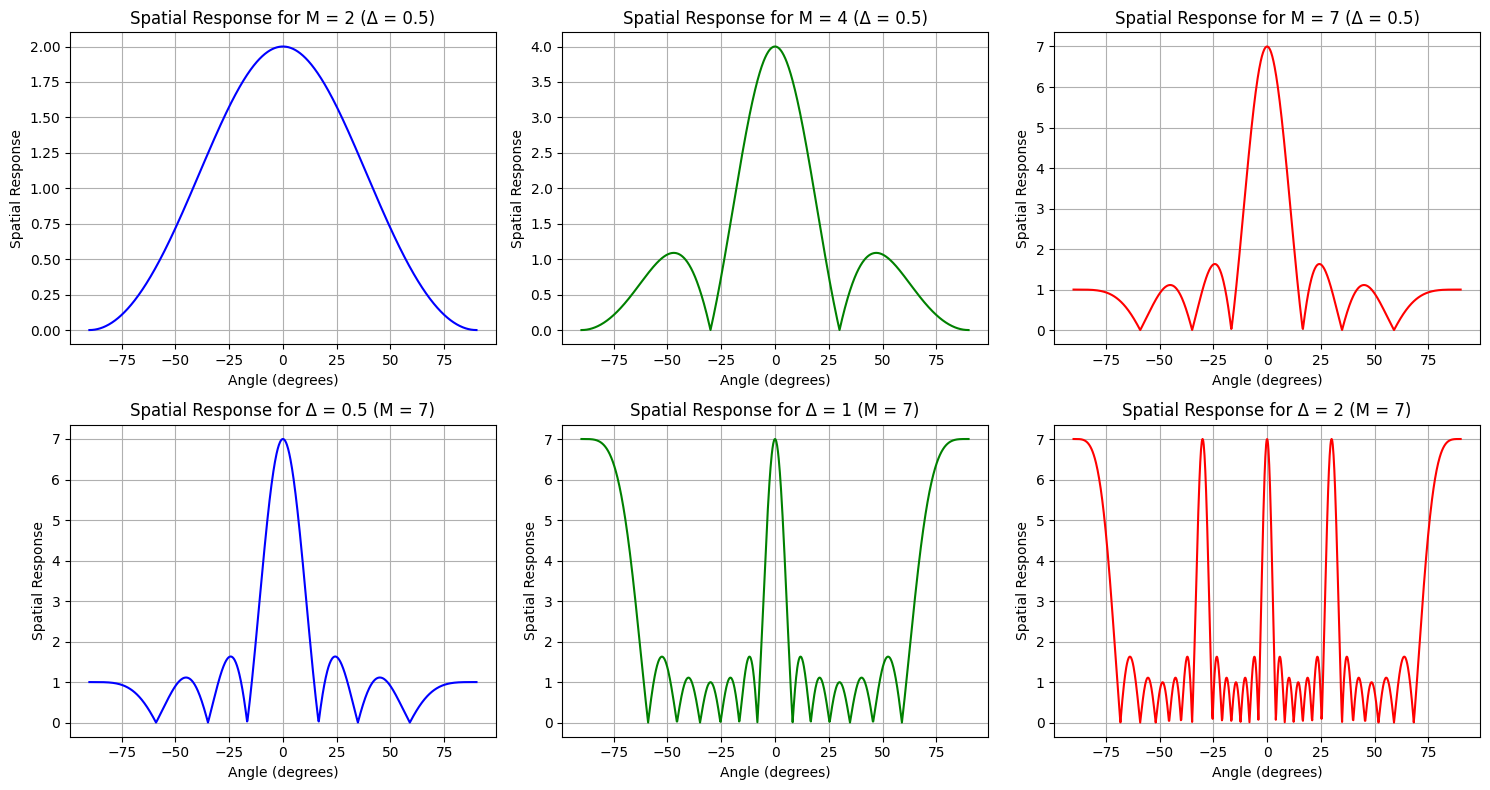

In [ ]:
# Define parameters
M_values = [2, 4, 7]
Delta_values = [0.5, 1, 2]
theta_range = np.linspace(-90, 90, 1000)
colors = ['b', 'g', 'r']  # Color list for each subplot

# Create a figure with 2 rows and 3 columns of subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))

# Plot spatial response for different M values
for i, M in enumerate(M_values):
    w = np.ones(M)
    axes[0, i].plot(theta_range, spat_response(w, 0.5, theta_range), label=f'M = {M}', color=colors[i])
    axes[0, i].set_title(f'Spatial Response for M = {M} (Δ = 0.5)')
    axes[0, i].set_xlabel('Angle (degrees)')  # Changed label to degrees
    axes[0, i].set_ylabel('Spatial Response')
    axes[0, i].grid(True)

# Plot spatial response for different Δ values
for i, Delta in enumerate(Delta_values):
    axes[1, i].plot(theta_range, spat_response(np.ones(7), Delta, theta_range), label=f'Δ = {Delta}', color=colors[i])
    axes[1, i].set_title(f'Spatial Response for Δ = {Delta} (M = 7)')
    axes[1, i].set_xlabel('Angle (degrees)')  # Changed label to degrees
    axes[1, i].set_ylabel('Spatial Response')
    axes[1, i].grid(True)

# Adjust spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()


**Observations**

* Increasing number of antennas (M) resolution increases and allows for more precise pinpointing of a source's direction. However,unwanted sidelobes appear alongside the main peak.
* To estimate directions of sources, we can scan $w$. For a single source, the peaks will denote the angle of the source's diretion. In case of Multiple sources, if they are well separated, they can be resolved.
* Increasing distance between consecutive antennas ($\Delta$) and consequently reducing sampling rate leads to increased artefacts due to aliasing.

**[10 pts] Question 2.** Plot the singular values of ${\bf X}$. Investigate the behavior of the singular values for varying direction of arrival (DOA) separation of two sources, e.g., ``separation" of 5 and 60 degrees, number of antennas $M \in \{7, 20\}$, $\Delta = 0.5$, number of  samples $N \in \{20, 100\}$, SNR 0 and 20 dB. Now repeat the same exercise based on the eigenvalues of $\hat{\bf R}_x = \frac{1}{N}{\bf X}{\bf X}^H$.

In [ ]:
# write scripts to generate the plots here

# Plot for varying M
def plot_singular_values(M_values,N_values,SNR_values,theta_values,Delta):
    for M in M_values:
        plt.figure(figsize=(20, 3))
        plt.suptitle(f'Singular Values of X for M={M} Separation {theta_values.max()- theta_values.min()} $\degree$')
        k=1
        for N in N_values:
            for SNR in SNR_values:
                X = gen_data(M, N, Delta, theta_values, SNR)
                _, s, _ = np.linalg.svd(X)
                plt.subplot(1,4,k)
                plt.scatter(x=np.arange(len(s)),y=s,marker ='o', label=f'N={N}, SNR={SNR} dB')
                k+=1
                plt.xlabel('Singular Value Index')
                plt.ylabel('Singular Value')
                plt.legend()
        plt.show()

In [ ]:
# Define parameters
M_values = [7, 20]
N_values = [20, 100]
SNR_values = [0, 20]
Delta = 0.5

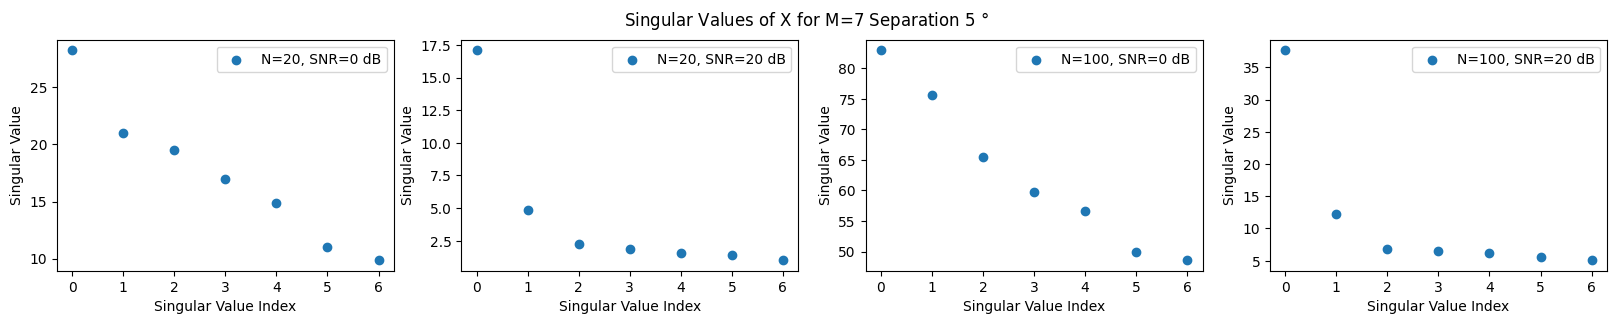

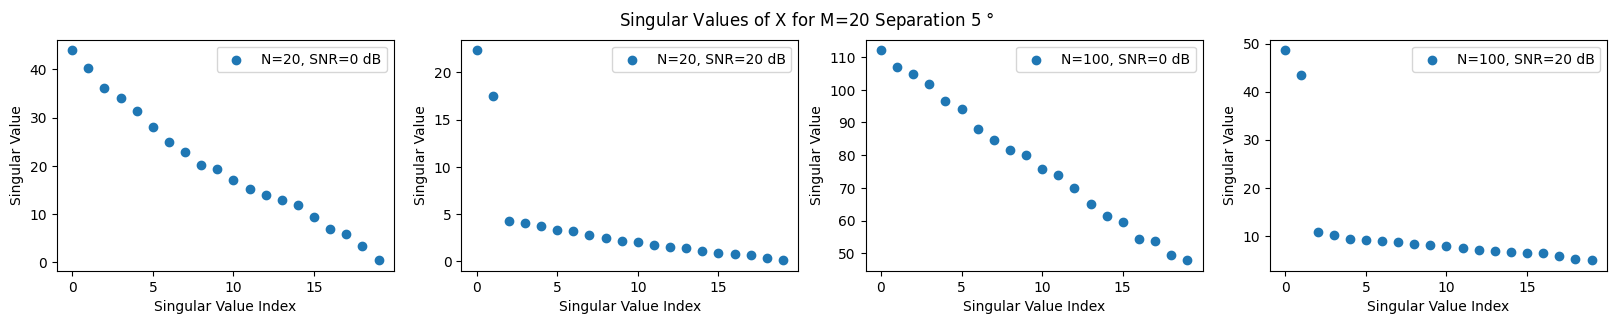

In [ ]:
theta_values = np.array([0, 5])

plot_singular_values(M_values,N_values,SNR_values,theta_values,Delta)

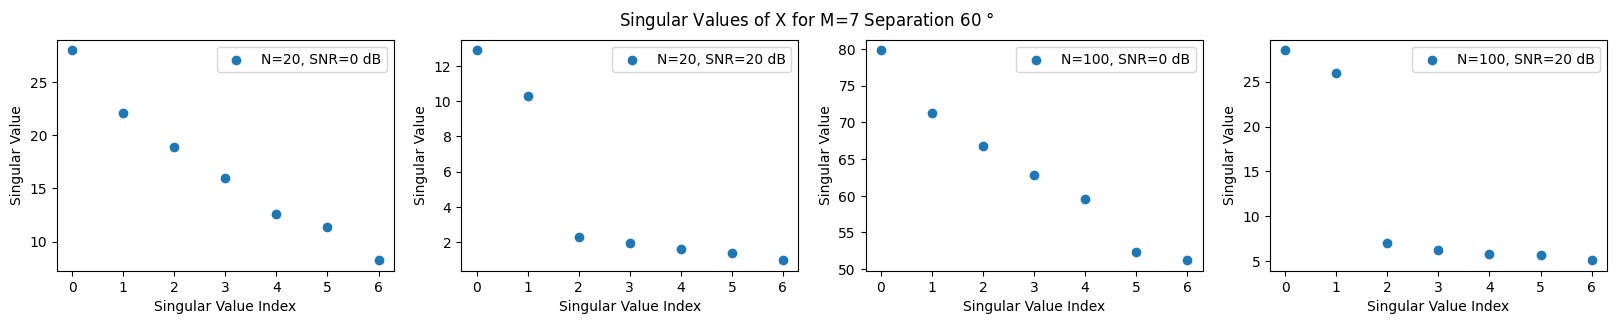

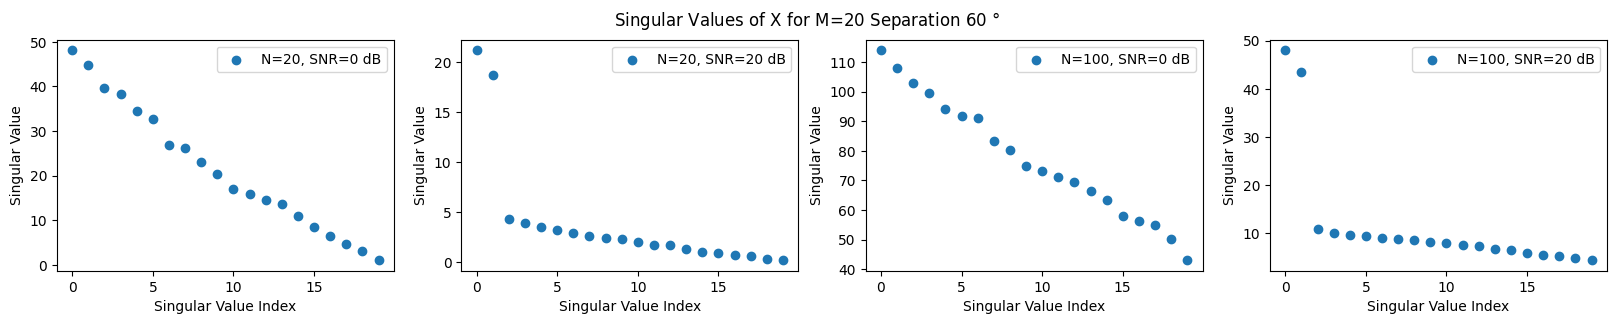

In [ ]:
theta_values = np.array([0, 60])

plot_singular_values(M_values,N_values,SNR_values,theta_values,Delta)

**Observations**

* When Sources are well Separated $(θ = [0°,60°]^T)$ :
    * Number of singular values of X with high value is equal to the number of sources and after that there is large gap and the following singular values are close.
    * Increasing value of $M$ results a higher resolution in the singular values
    * Heavy Noise ($SNR = 0dB$) leads to no clear distinction of source and results in gradual decrease from high to low singular values.

* When Sources are not well Separated $(θ = [0°,5°]^T)$
    *  Reduction in $M (M = 7)$ results in bad resolution and caused $1$ high singular value instead of $2$ (no. of sources = 2)

In [ ]:
def plot_eigen_values(M_values,N_values,SNR_values,theta_values,Delta):

    for M in M_values:
        plt.figure(figsize=(20, 3))
        plt.suptitle(f'EIgen Values of $R_X$ for M={M} Separation {theta_values.max()- theta_values.min()} $\degree$')
        k=1
        for N in N_values:
            for SNR in SNR_values:
                X = gen_data(M, N, Delta, theta_values, SNR)
                R = 1/N * (X @ np.conjugate(X.T))
                eigs = np.linalg.eigvals(R)

                plt.subplot(1,4,k)
                plt.scatter(np.arange(len(eigs)),np.abs(eigs), label=f'N={N}, SNR={SNR} dB')
                plt.xlabel('Eigen Value Index')
                plt.ylabel('Eigen Value')
                k+=1
                plt.legend()
        plt.show()

In [ ]:
# Using Rx = 1/N XX^H

# Define parameters
M_values = [7, 20]
N_values = [20, 100]
SNR_values = [0, 20]

Delta = 0.5

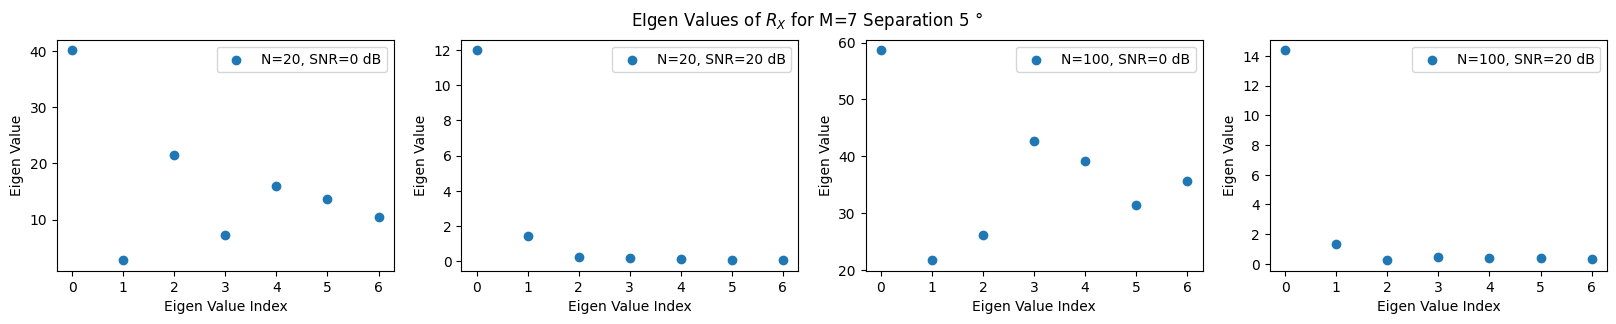

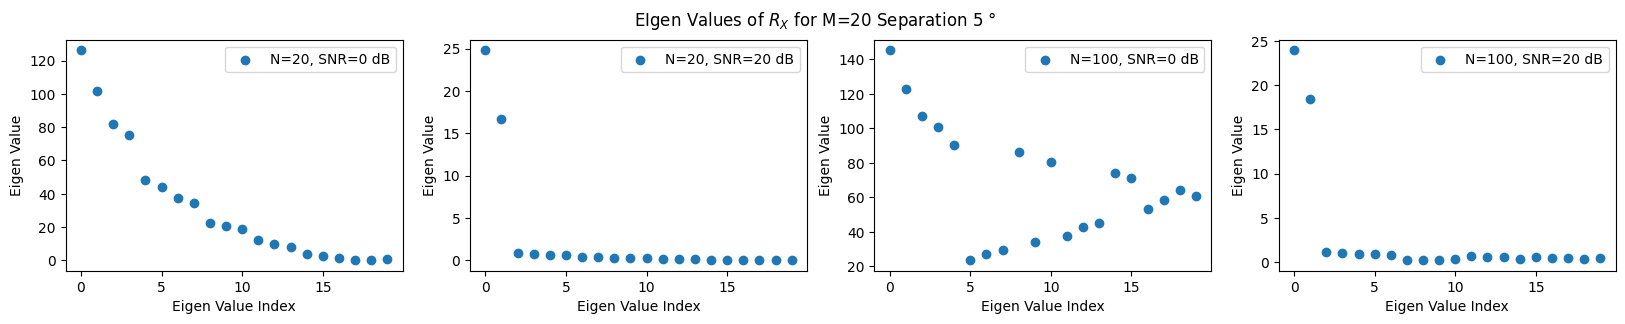

In [ ]:
theta_values = np.array([0, 5])

plot_eigen_values(M_values,N_values,SNR_values,theta_values,Delta)

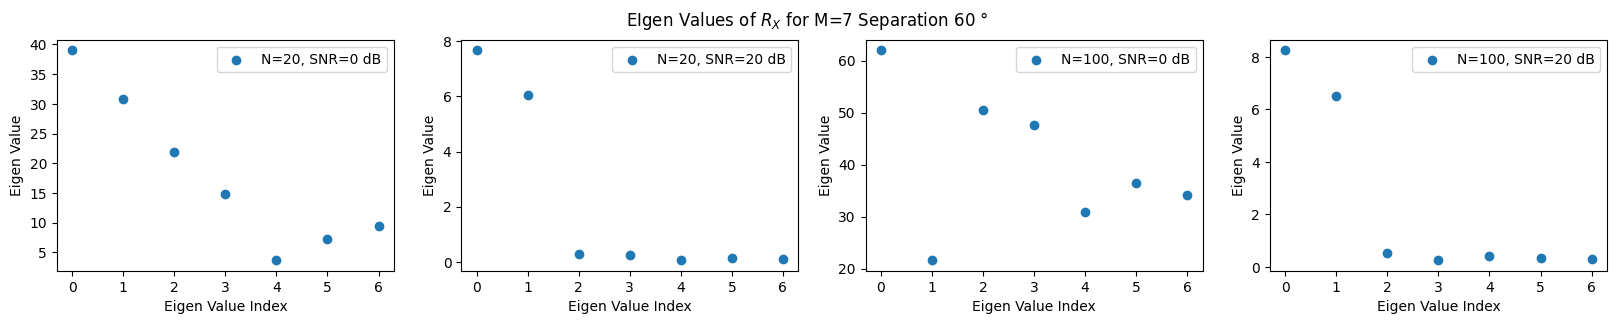

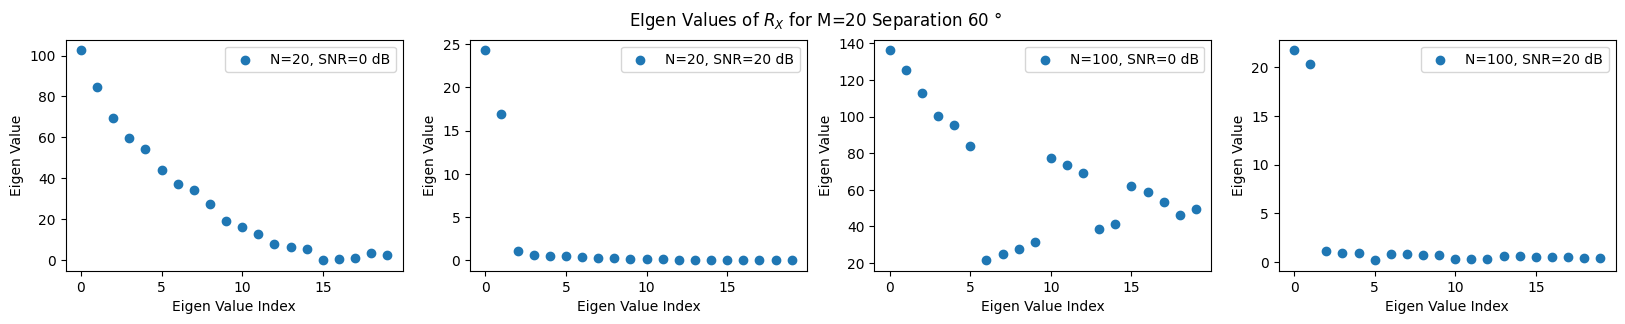

In [ ]:
theta_values = np.array([0, 60])

plot_eigen_values(M_values,N_values,SNR_values,theta_values,Delta)

**Observations**

* When Sources are well Separated $(θ = [0°,60°]^T)$ :
    * Number of eigen values of $R_x$ with high value is equal to the number of sources and after that there is large gap and the following singular values are close.
    * Increasing value of $M$ results a higher resolution in the eigen values
    * Heavy Noise ($SNR = 0dB$) leads to erratic eigen values.

* When Sources are not well Separated $(θ = [0°,5°]^T)$
    *  Reduction in $M (M = 7)$ results in bad resolution and caused $1$ high eigen value instead of $2$ (no. of sources = 2)

**[10 pts] Question 3.**  Consider a system with two sources and take
${\boldsymbol \theta} = [0^\circ,
  5^\circ]^T$, $M=5$, $\Delta=0.5$, and $N=1000$. Now compute the
  matched filter ${\bf W}^H = {\bf A}$ and the zero-forcing receiver ${\bf W}^H= {\bf A}^\dagger$, assuming the mixing matrix
  ${\bf A}_\theta$ and the noise variance $\sigma^2$ are known. For each
  of these beamformers, plot the estimated
  symbols in the complex plane for a few SNR values,
  such that you observe four clusters. From these plots, what can you conclude about the performance of these three beamformers?  Repeat the exercises but now take ${\boldsymbol \theta} = [0^\circ,
  60^\circ]^T$ instead of ${\boldsymbol \theta} = [0^\circ,
  5^\circ]^T$. How do the results compare with the
  previous results?  

In [ ]:
# write scripts to generate the plots here

def plot_estimated_symbols(M,N,SNR_values,theta,Delta):

    # Generate data and plots for each SNR value
    plt.figure(figsize=(20, 10))
    k=1
    plt.suptitle(f'Separation {theta.max()- theta.min()} $\degree$')

    for SNR in SNR_values:
        X = gen_data(M, N, Delta, theta, SNR)

        # Beamformer 1 (Matched Filter Beamforming)
        A = np.array([gen_a(M, Delta, theta_value) for theta_value in theta]).T
        W1 = A.copy()
        Y1 = X.T @ np.conjugate(W1)

        # Beamformer 2 (Zero - Forcing Reciever Beamforming)
        W2 = np.linalg.pinv(A)
        Y2 = X.T @ np.conjugate(W2).T

        # Extract real and imaginary parts for plotting
        data1 = Y1[:, 1]
        x1 = [ele.real for ele in data1]
        y1 = [ele.imag for ele in data1]

        data2 = Y2[:, 1]
        x2 = [ele.real for ele in data2]
        y2 = [ele.imag for ele in data2]

        # Plot Beamformer 1 output
        plt.subplot(2,4,k)
        plt.scatter(x1, y1,color='b', label='Beamformer 1')
        plt.ylabel('Imaginary')
        plt.xlabel('Real')
        plt.title(f'Beamformer ($W^H = A$) Output (SNR = {SNR} dB)')
        plt.grid(True)


        # Plot Beamformer 2 output
        plt.subplot(2,4,k+4)
        plt.scatter(x2, y2, color='r',label='Beamformer 2')
        plt.ylabel('Imaginary')
        plt.xlabel('Real')
        plt.title(f'Beamformer ($W^H = A^\dagger$) Output (SNR = {SNR} dB)')
        plt.grid(True)
        k+=1

        plt.tight_layout()
    plt.show()

In [ ]:
# Define parameters
M = 7
N = 1000
SNR_values = [0,20,40,60]
Delta = 0.5

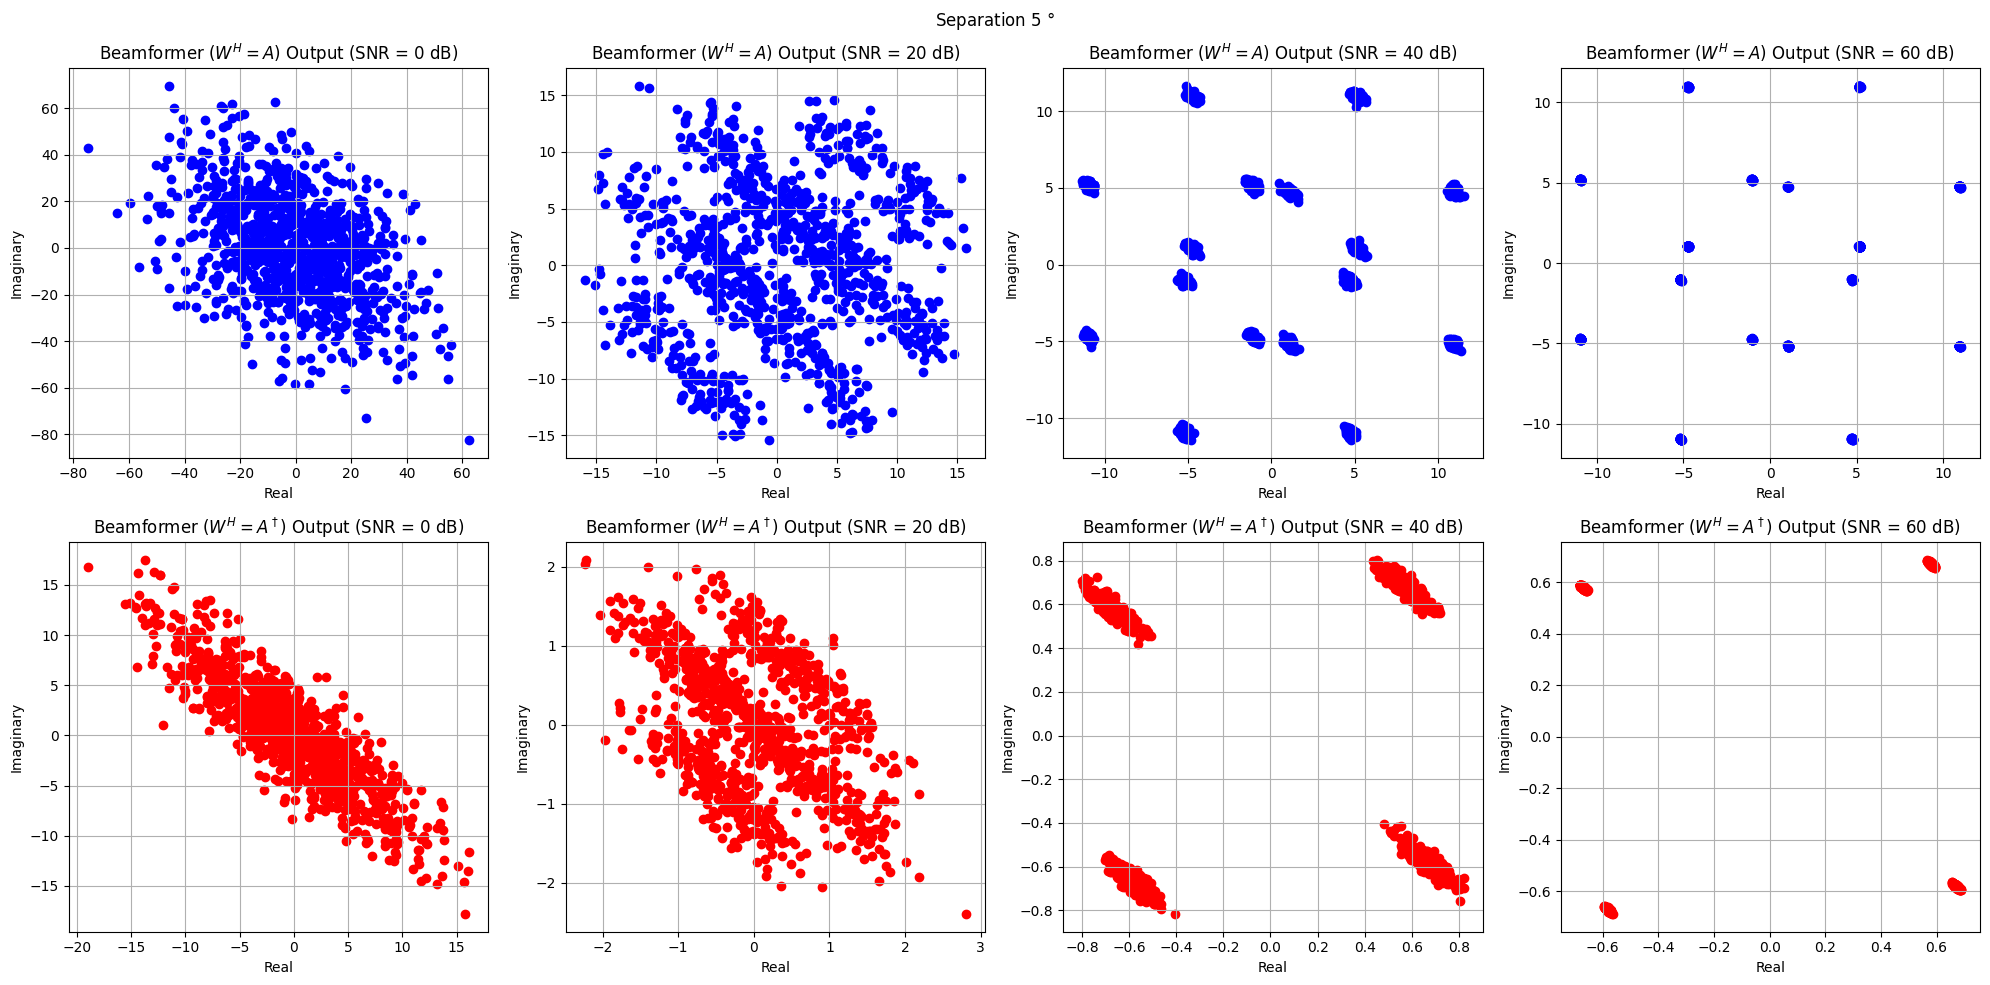

In [ ]:
theta = np.array([0, 5])

plot_estimated_symbols(M,N,SNR_values,theta,Delta)

 **Observations for Small Separation [0°, 5°]**

* **Matched Filter $(W^H = A)$**

    * At Heavier Noise (SNR 0/20 dB), the estimated symbols form overlaping clusters around the origin.
    
    * At  Lower Noise (SNR 40/60 dB), the  clusters are much tighter and more distinct but the number of clusters is more than 4.


* **Zero-Forcing Receiver $(W^H=A^†)$**

    * At Heavier Noise (SNR 0/20 dB), the estimated symbols form overlapping clusters, and they are much more spread out compared to the matched filter output.
    * At  Lower Noise (SNR 40/60 dB), the clusters are much more distinct and tighter than at 20 dB, but they are still more spread out compared to the matched filter output at the same SNR.

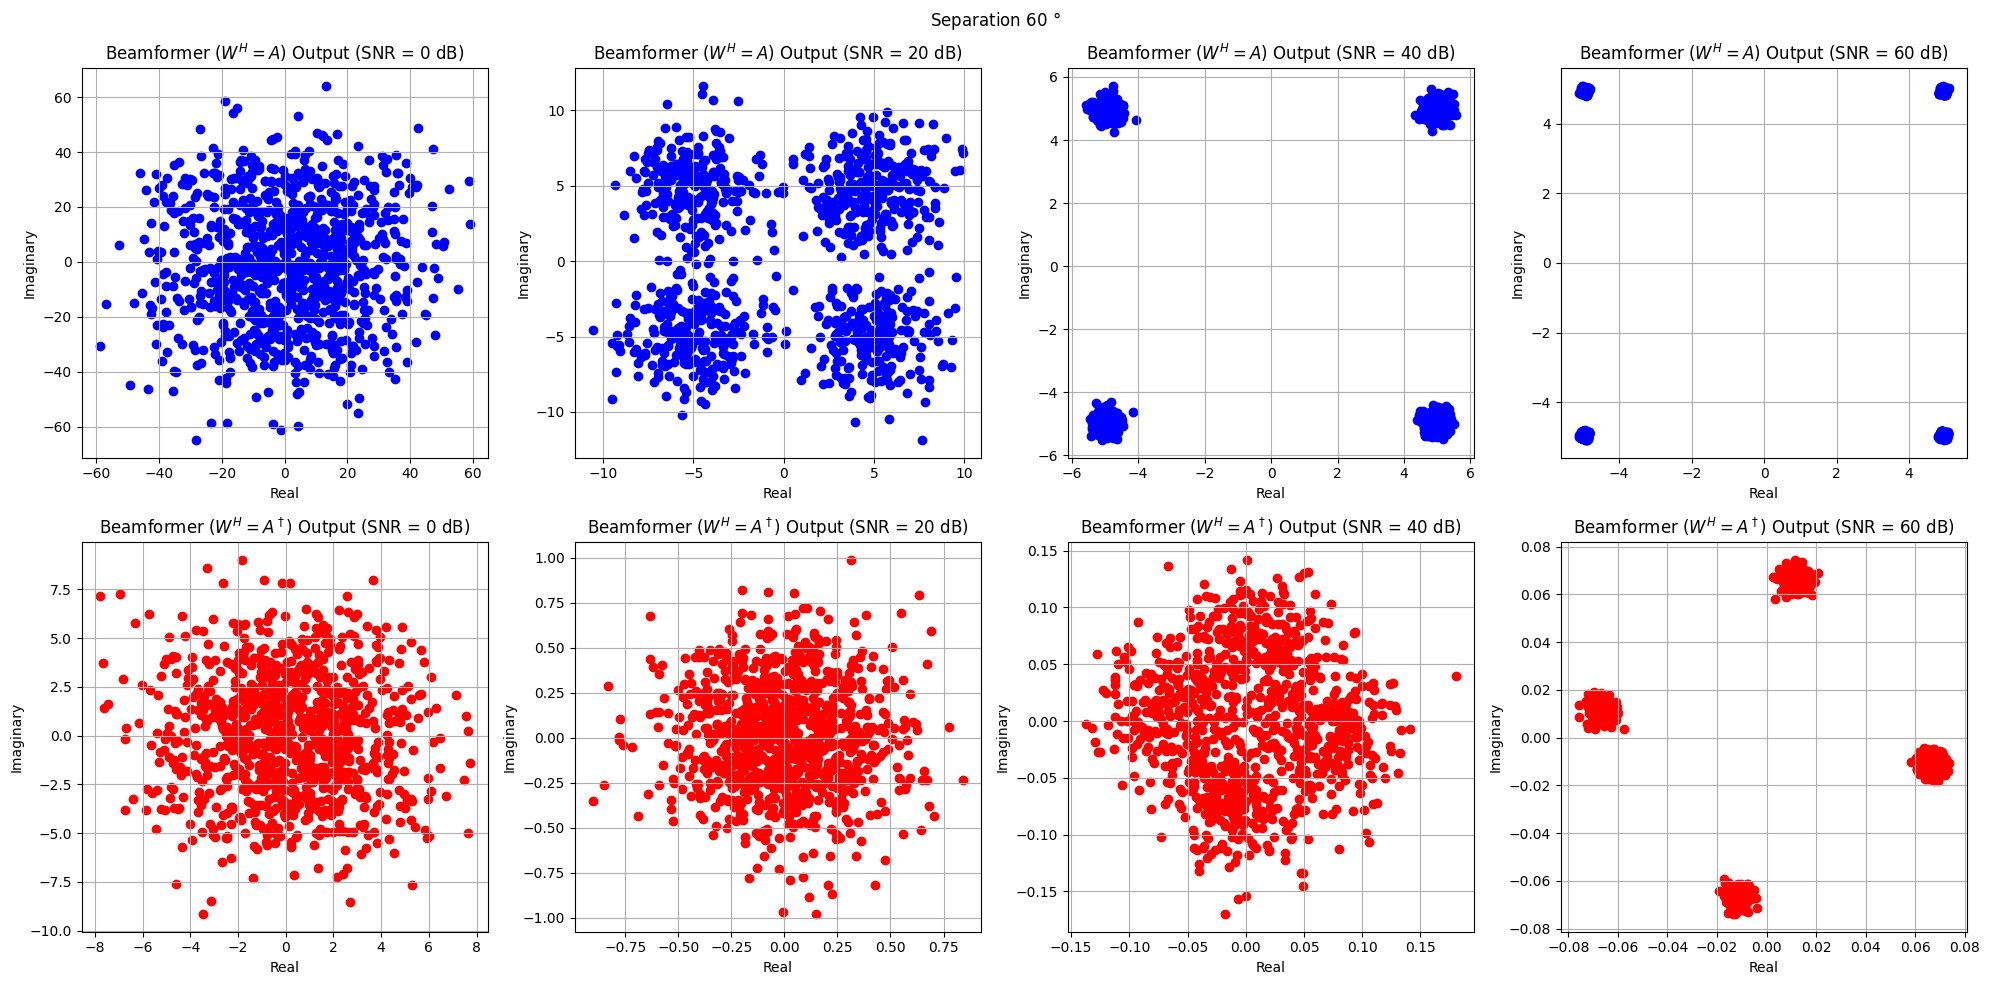

In [ ]:
theta = np.array([0, 60])

plot_estimated_symbols(M,N,SNR_values,theta,Delta)

 **Observations for Large Separation [0°, 60°]**

* **Matched Filter $(W^H = A)$**

    * At Heavier Noise (SNR 0dB), the estimated symbols form overlaping clusters around the origin.
    
    * At  Lower Noise (SNR 20/40/60 dB), there are four clusters which are much tighter and more distinct.


* **Zero-Forcing Receiver $(W^H=A^†)$**

    * At Heavier Noise (SNR 0/20 dB) and SNR 40 dB, the estimated symbols form very overlapping clusters but the spreaed keeps on decreasing as SNR increases.
    * At  Lower Noise (SNR 60 dB), the clusters are much more distinct and tighter.

**Conclusions**

* For Small Separation between sources, Zero-Forcing Reciever is the better option by far.
* For large separation, Matched Filter performs better.
* In both cases, Filter performances improve with increased SNR.

**[10 pts] Question 4.** Estimate the direction of arrival of the two sources using classical beamforming, MVDR beamforming, and MUSIC. Make a plot of spatial spectrum vs. DOA. To make this plot, consider $N=100$ and $\rm{SNR}=20$ dB. Repeat the exercises but now take ${\boldsymbol \theta} = [0^\circ,
  60^\circ]^T$ instead of ${\boldsymbol \theta} = [0^\circ,
  5^\circ]^T$. How do the results compare with the  previous results?  

In [ ]:
# write scripts to generate the plots here

def plot_spatial_spectrum_vs_DOA(M,N,SNR,theta_values):

    X = gen_data(M, N, Delta, theta_values, SNR)

    R = 1/N * (X @ np.conjugate(X.T))

    theta_search = np.linspace(-90,90,180)

    # Classical BF

    J_classical_BF = np.zeros_like(theta_search,dtype = 'complex')

    for i,theta in enumerate(theta_search):

        a = gen_a(M, Delta, theta).reshape(-1,1)

        temp = ((np.conjugate(a).T @ R @ a) / (np.conjugate(a).T @ a)) [0][0]

        J_classical_BF[i] = temp

    J_classical_BF_abs = 20 * np.log(np.abs(J_classical_BF))


    # MVDR
    J_MVDR = np.zeros_like(theta_search,dtype = 'complex')

    for i,theta in enumerate(theta_search):

        a = gen_a(M, Delta, theta).reshape(-1,1)

        temp = (np.conjugate(a).T @ np.linalg.inv(R) @ a)[0][0]

        J_MVDR[i] = 1 / temp

    J_MVDR_abs = 20 * np.log(np.abs(J_MVDR))

    # MUSIC

    J_MUSIC = np.zeros_like(theta_search,dtype = 'complex')

    l,U = np.linalg.eig(R)
    U_n = U[:,len(theta_values):]

    for i,theta in enumerate(theta_search):

        a = gen_a(M, Delta, theta).reshape(-1,1)

        t = ((np.conjugate(a).T @ U_n @ np.conjugate(U_n).T @ a) / (np.conjugate(a).T @ a))[0][0]

        J_MUSIC[i] = 1 / t

    J_MUSIC_abs = 20 * np.log(np.abs(J_MUSIC))

    plt.figure(figsize = (15,5))
    plt.title(f'DOA Estimation Angles : {theta_values}')
    plt.plot(theta_search,J_classical_BF_abs, '-o', label = 'Classical BF')
    plt.plot(theta_search,J_MVDR_abs, 'b-+', label = 'MVDR')
    plt.plot(theta_search,J_MUSIC_abs, 'r-x', label = 'MUSIC')
    plt.xlabel('$Angle [deg] $')
    plt.ylabel('Power (dB)')
    plt.legend()
    plt.grid()
    plt.show()

In [ ]:
# Define parameters

M = 7
N = 100
SNR = 20

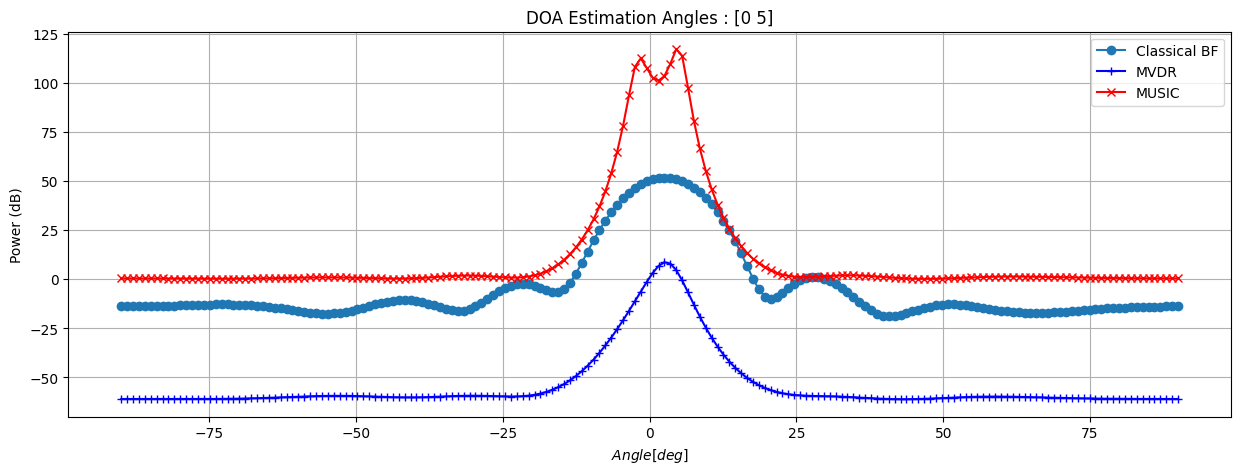

In [ ]:
theta_values = np.array([0,5])

plot_spatial_spectrum_vs_DOA(M,N,SNR,theta_values)

**Observations:**

* The Classical BF and MVDR show 1 peak and MUSIC show peaks around 0° and 5°, indicating that the two sources are likely arriving from that direction.

* Classical beamforming has the widest peak among the three. This suggests that classical beamforming is less precise in determining the DOA of the sources compared to MVDR and MUSIC. Also the peaks are so overlapped that, it is not possible to resolve them resulting in detection of only one source.

* Similar to Classifcal Beamforming MVDR beamforming also has one peak which resulted in resolving a single peak and subsequently a single source detection.

* MUSIC appears to have a sharper peak than MVDR, which resulted in higher resolution and proper detection of the two sources and provided potentially higher accuracy in DOA estimation in this case.

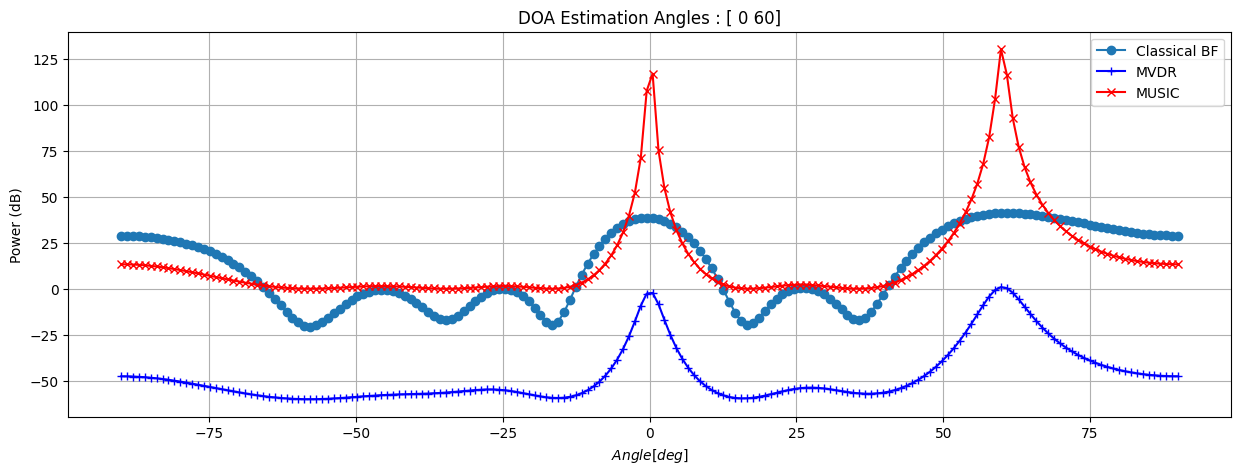

In [ ]:
theta_values = np.array([0,60])

plot_spatial_spectrum_vs_DOA(M,N,SNR,theta_values)

**Observations:**

* The Classical Beamforming method has a wider peak compared to $MVDR$ and $MUSIC$. This suggests that classical beamforming is less precise in determining the DOA of the sources.
* MVDR beamforming has a sharper peak than classical beamforming, indicating better accuracy in DOA estimation.
* MUSIC has the sharpest peak among the three methods, suggesting the highest accuracy in DOA estimation.

In conclusion, all three beamforming techniques can estimate the DOA of the two sources with some accuracy. However, MUSIC appears to provide the most precise estimate, followed by MVDR and then classical beamforming. This is likely because MUSIC exploits the orthogonality between the signal and noise subspaces, leading to a more focused peak in the spatial spectrum.